# Kernel methods

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge

...

## (1) Ridge Regression without kernel

We obtain the solution to a linear regression with respect to our weights w as previously
discussed in the lectures.

$$C(w) = \frac{1}{2}\sum_{n=1}^{N}(w^T x_n-y_n)^2+\frac{\lambda}{2}w^Tw$$

To implement this, consider the underlying model y = 2x. Generate data with some Gaussian
noise (100 datapoints). <br>
Solve the optimisation problem for λ = 0, 0.1, 1 as described in the
lectures.

Minimum: <br>
$$0 = \frac{\partial C}{\partial w}=\sum_{n=1}^{N}(w^T x_n-y_n)x_m+\lambda w = x^T x w+\lambda w - x^T y$$
<br> with the solution <br>
$$w_\textrm{optimal} = \frac{x^T y}{x^T x+\lambda}$$

In [2]:
# generate data
x = np.linspace(1,100,100)
noise = np.random.normal(scale=1, size = 100)
y = 2*x + noise

"""
def generate_data(num_samples=100):
    x = np.linspace(-1, 1, num_samples)
    # To illustrate the equivalence we set the variance of the noise rather low. It works just
    # as well for nosier data, but 100 samples are a bit too few to see it well.
    y = 2 * x + np.random.normal(size=num_samples, scale=0.1)
    return x, y
"""

# lambda
lambdas = [0, 0.1, 1] 

### Directly via formula

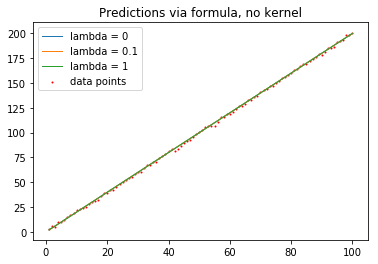

In [3]:
# calculate weights via formula
w_formula = [] # weights via formula

for lam in lambdas:
        
    # w_formula
    w = 1/(np.dot(x,x) + lam) * np.dot(x,y)
    w_formula.append(w)
    
    label = "lambda = "+str(lam)
    plt.plot(x, w*x, linewidth=1, label = label)
    
    
# plot w_formula
plt.scatter(x,y, s=1, c = "red", label = "data points")
plt.legend()
plt.title("Predictions via formula, no kernel")
plt.show()

### Via sklearn Ridge ( not needed )

In [4]:
# calculate weights via Ridge 
ridge = linear_model.Ridge(fit_intercept=False) 
w_ridge = [] 

for lam in lambdas:
    
    # w_ridge
    ridge.set_params(alpha=lam) # set regularisation parameter
    ridge.fit(x[:, np.newaxis], y) # fit model 
    w_ridge.append(ridge.coef_) # store weights

    

# compare w_formula to w_ridge
print("w_formula for lambda = 0, 0.1, 1:")
print(w_formula)
print("\nw_ridge for lambda = 0, 0.1, 1:")
print(w_ridge)
    

w_formula for lambda = 0, 0.1, 1:
[1.9975033885883677, 1.9975027982225342, 1.9974974849457343]

w_ridge for lambda = 0, 0.1, 1:
[array([1.99750339]), array([1.9975028]), array([1.99749748])]


<br>
All good :) <br>

Both methods give the same result: the weights are all very close to $2$. <br>

There is virtually no difference between the $ \lambda $
<br>

## (2) Ridge Regression with kernel

We now introduce a kernel $φ(x) = (x, x^2)$. <br>
Solve again the problem for the underlying model $y = 2x$. <br>
Note that this time you need to recalculate the target values $t_n$ appropriately.


Now with the kernel <br>
$$ C(w) = \frac{1}{2}\sum_{n=1}^{N}(w^T \phi(x_n)-t_n)^2+\frac{\lambda}{2} w^T w $$
<br> and <br>
$$ w_\textrm{optimal} = ( \phi^T \phi + \lambda \ 1_{2x2} )^{-1} \phi^T \ t_n $$

### Via formula

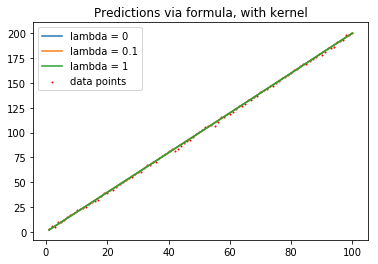

In [5]:
# phi_transpose and phi
phi_transpose = np.array([x,np.square(x)])
phi = np.transpose(phi_transpose)
t = y # does work
#t = y + y**2 # doesn't work


w_kernel_formula = []
pred_kernel_formula = [] # predictions

        
j = 0 # counter

for lam in lambdas:
    
    # formula
    w = np.matmul(np.matmul(np.linalg.pinv(np.matmul(phi_transpose, phi) + lam * np.identity(2)), phi_transpose), t)
    w_kernel_formula.append(w)
    
    # prediction
    pred_kernel_formula.append( w_kernel_formula[j].transpose().dot(phi_transpose) )
    j += 1
    
    # plot predictions 
    plt.plot(x[:, np.newaxis], pred_kernel_formula[0].transpose(), label = "lambda = "+str(lam) )

    
# plot predictions 
plt.scatter(x,y, s=1, c = "red", label = "data points")
plt.title("Predictions via formula, with kernel")
plt.legend()
plt.show()

### Via sklearn KernelRidge ( not needed )

In [6]:
phi_n = []
t_n = []


for i in range(len(x)):
    phi_n.append([x[i], x[i]**2])
    t_n.append([y[i]]) 
    
    
# turn into np arrays
phi_n = np.array(phi_n)
t_n = np.array(t_n)


# kernel function used for KernelRidge
def calc_kernel(x_1, x_2):

    phi_i = np.array([x_1, x_1**2])
    phi_iT = phi_i.transpose()
    phi_j = np.array([x_2, x_2**2])
    k_ij = phi_iT.dot(phi_j)
    
    return k_ij


# data in right shape
x1 = x[:, np.newaxis]
y1 = y[:, np.newaxis]


kernel_ridge = KernelRidge(kernel = calc_kernel, degree = 2)
w_kernelRidge = []
pred_kernelRidge = []

for lam in lambdas:
    
    # KernelRidge
    kernel_ridge.set_params(alpha=lam)
    kernel_ridge.fit(x1, y1)
    w_kernelRidge.append(kernel_ridge.dual_coef_) # weight vector(s) in kernel space
    
    # prediction from KernelRidge
    pred_kernelRidge.append(kernel_ridge.predict(x1)) # not used
    
    
print('Weights via formula for kernel for lambda = 0, 0.1, 1.0:')
print(w_kernel_formula)

print('\nCompare predictions (kernel_formula - kernelRidge)')
for j in range(3):
    print( np.linalg.norm( pred_kernel_formula[j] - pred_kernelRidge[j].transpose() ) )

Weights via formula for kernel for lambda = 0, 0.1, 1.0:
[array([1.98708069e+00, 1.38281288e-04]), array([1.98707130e+00, 1.38398178e-04]), array([1.98698672e+00, 1.39450142e-04])]

Compare predictions (kernel_formula - kernelRidge)
5.581029627407266e-10
2.390033188047894e-06
2.816460409108151e-07


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:154: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


<br>
All good :) <br>

The first value ($x$) is close to $2$ <br>
The second value ($x^2$) is close to $0$. <br>

The predictions from the formula & kernelRidge match <br>

Again there is virtually no difference between the $\lambda $.
<br>

## (3) Kernel

Calculate the kernel function $ k(x_n, x_m) = φ(x_n)^T φ(x_m)$

In [7]:
# kernel
kernel = np.matmul(phi, phi_transpose)

print(kernel)

[[2.0000000e+00 6.0000000e+00 1.2000000e+01 ... 9.7020000e+03
  9.9000000e+03 1.0100000e+04]
 [6.0000000e+00 2.0000000e+01 4.2000000e+01 ... 3.8612000e+04
  3.9402000e+04 4.0200000e+04]
 [1.2000000e+01 4.2000000e+01 9.0000000e+01 ... 8.6730000e+04
  8.8506000e+04 9.0300000e+04]
 ...
 [9.7020000e+03 3.8612000e+04 8.6730000e+04 ... 9.2246420e+07
  9.4138506e+07 9.6049800e+07]
 [9.9000000e+03 3.9402000e+04 8.8506000e+04 ... 9.4138506e+07
  9.6069402e+07 9.8019900e+07]
 [1.0100000e+04 4.0200000e+04 9.0300000e+04 ... 9.6049800e+07
  9.8019900e+07 1.0001000e+08]]


## (4) Kernel in dual formulation

Using this kernel function solve the optimisation problem for the dual variables a.

With $w = \phi^T a $ one gets <br>
$$C(a)=\frac{1}{2}a^T K K a - a^T K t + \frac{1}{2} t^T t+\frac{\lambda}{2} a^T K a$$
<br>
which is minimized for <br>
$$a= ( K+\lambda \ 1_{100x100})^{-1} \ t $$

In [8]:
# a = (k + Lambda)^-1 * t_n

a = []
w_dual = []
        
for lam in lambdas:
    
    _a = np.matmul(np.linalg.pinv(kernel + lam * np.identity(100)), t)
    w = np.matmul(phi_transpose, _a)
    
    w_dual.append(w)
    a.append(_a)



## (5) Confirmation

Show that both solutions agree by obtaining w from your solution a.

In [9]:

    
print("compare results:\n")
print("from Kernel via formula:")
print(w_kernel_formula)
print("\nfrom dual formulation:")
print(w_dual)

compare results:

from Kernel via formula:
[array([1.98708069e+00, 1.38281288e-04]), array([1.98707130e+00, 1.38398178e-04]), array([1.98698672e+00, 1.39450142e-04])]

from dual formulation:
[array([1.98708069e+00, 1.38281288e-04]), array([1.98707130e+00, 1.38378142e-04]), array([1.98698672e+00, 1.39449900e-04])]


All good :) <br>

The values are identical to the ones above. <br>
The first value (corresponding to $x$) is close to $2$ and the second value (corresponding to $x^2$) is close to $0$. 
 